In [45]:
# Imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import warnings 
warnings.filterwarnings("ignore")

In [46]:
steel_df = pd.read_csv(r"C:\Users\Hrushikesh\Python\Python\Machine learning\linear regression\steel+industry+energy+consumption\Steel_industry_data.csv", header = 0)
steel_df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [47]:
print(steel_df.dtypes)
print()
print(steel_df.shape)
print()
print(steel_df.describe())
print()
print(steel_df.info())


date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

(35040, 11)

          Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
count  35040.000000                          35040.000000   
mean      27.386892                             13.035384   
std       33.444380                             16.306000   
min        0.000000                              0.000000   
25%        3.200000                              2.300000   
50%        4.570000                              5.000000   
75%       51.2375

In [48]:
for x in steel_df.columns:
    if steel_df[x].dtype=='object':
        print({x:steel_df[x].unique()})

{'date': array(['01/01/2018 00:15', '01/01/2018 00:30', '01/01/2018 00:45', ...,
       '31/12/2018 23:30', '31/12/2018 23:45', '31/12/2018 00:00'],
      dtype=object)}
{'WeekStatus': array(['Weekday', 'Weekend'], dtype=object)}
{'Day_of_week': array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)}
{'Load_Type': array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)}


In [49]:
steel_df.drop(['date'], axis = 1, inplace = True)
steel_df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [50]:
steel_df.duplicated().sum()

81

In [51]:
# Deleting the duplicates
steel_df.drop_duplicates(inplace = True)
steel_df.shape

(34959, 10)

In [52]:
print(steel_df.dtypes)
print()

Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object



In [53]:
steel_df.WeekStatus.replace({"Weekend":0, "Weekday":1}, inplace = True)
steel_df.Day_of_week .replace({"Monday":0, "Tuesday":1, "Wednesday":2, "Thursday":3, "Friday":4, "Saturday":5, "Sunday":6}, inplace = True)
steel_df.Load_Type.replace({"Light_Load":0, "Medium_Load":1, "Maximum_Load":2}, inplace = True)

In [54]:
steel_df

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,1,0,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,1,0,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,1,0,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,1,0,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,1,0,0
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,1,0,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,1,0,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,1,0,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,1,0,0


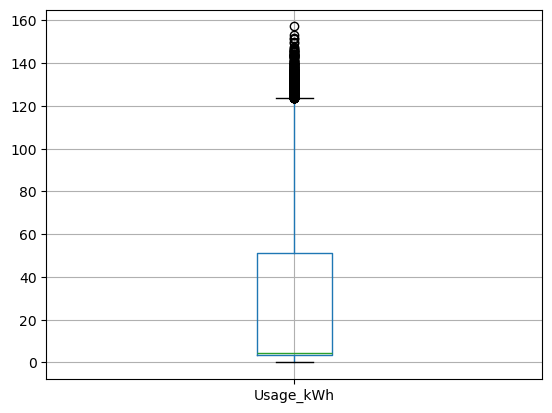

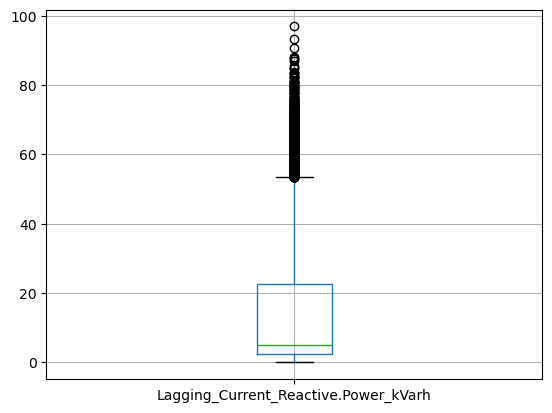

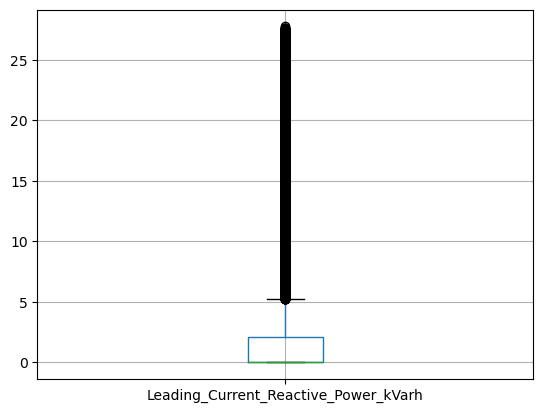

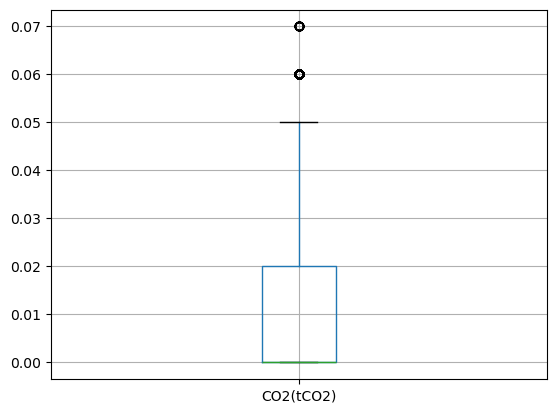

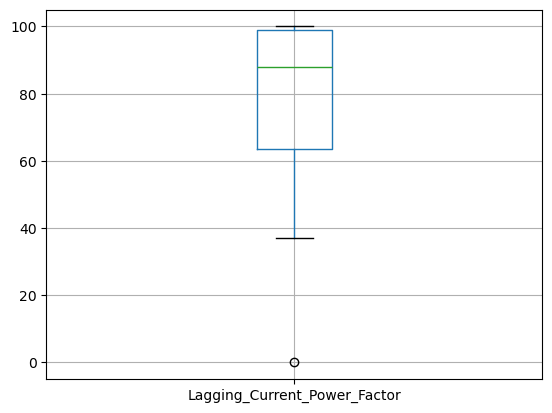

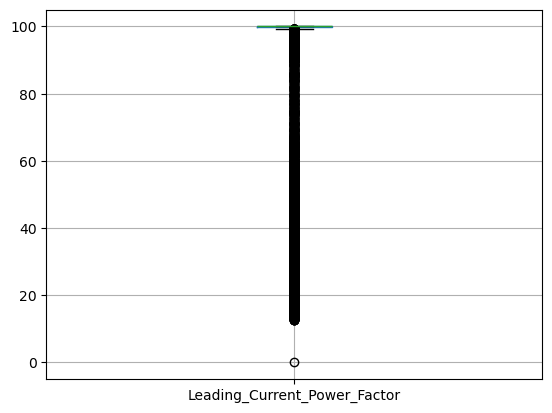

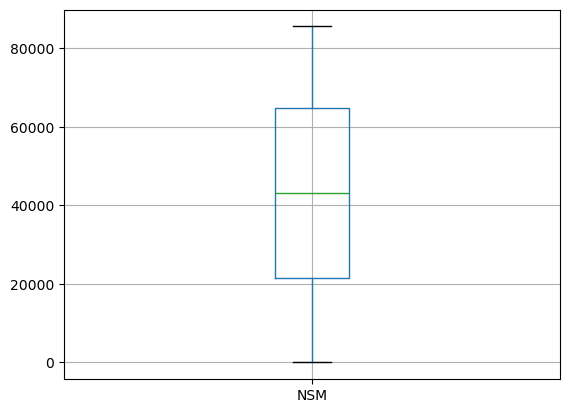

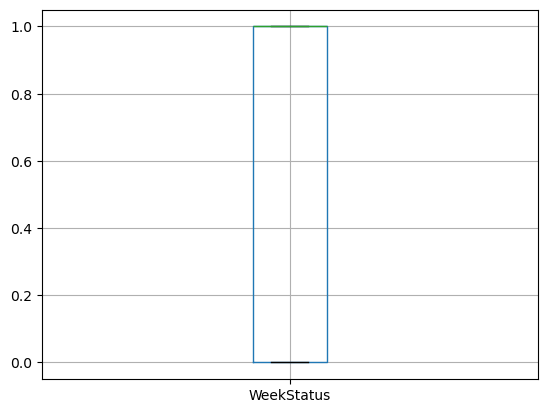

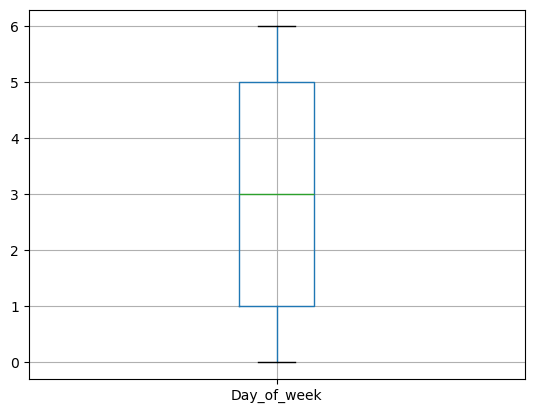

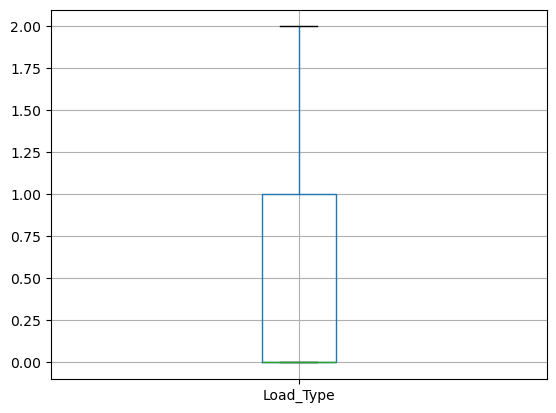

In [55]:
# Assumption 1: There should be no outliers in data
# Check box plot
for i in steel_df.columns:
    steel_df.boxplot(column = i)
    plt.show()

In [56]:
print(steel_df.dtypes)

Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                                int64
Day_of_week                               int64
Load_Type                                 int64
dtype: object


In [57]:
steel_df.columns

Index(['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

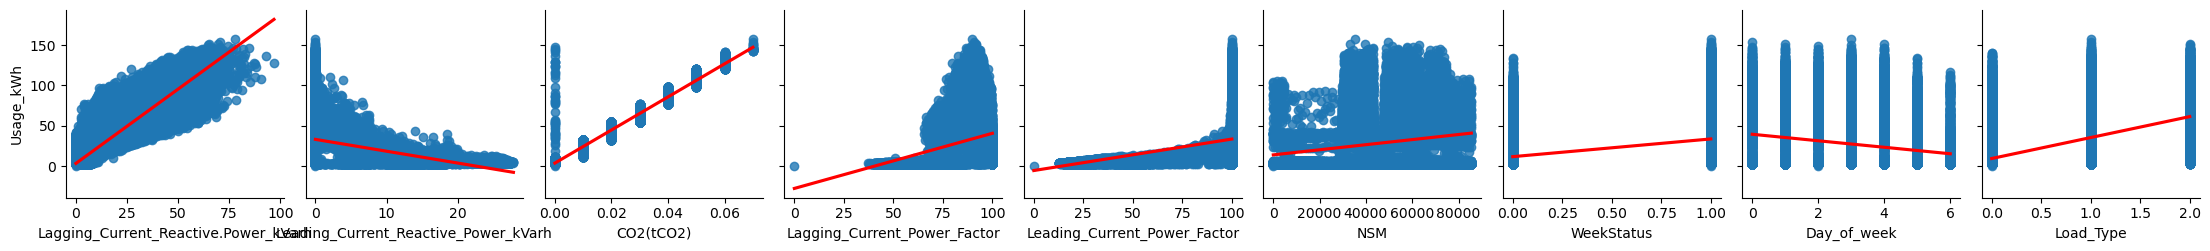

In [58]:
#assumption2 of linearity : every independent variable should have a
#linear relationship  with the dep variable

sns.pairplot(steel_df,x_vars=['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
            y_vars=["Usage_kWh"],kind="reg",plot_kws={'line_kws':{'color':'red'}})
plt.show()

* co2 and lagging current preactive power kvarh shows high positive linear relation with usage
* usage and Leading_Current_Reactive_Power_kVarh---> weak negative linear relation 
* usage and Lagging_Current_Power_Factor ---->moderate  positive linear relation 
* usage and Leading_Current_Power_Factor -----. weak positive linear realtion
* usage and NSM ----> weak positive realtion

In [59]:
X = steel_df.loc[:, ['Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type']] 
Y = steel_df.loc[:, "Usage_kWh"]

In [60]:
print(X.shape)
print()
print(Y.shape)

(34959, 9)

(34959,)


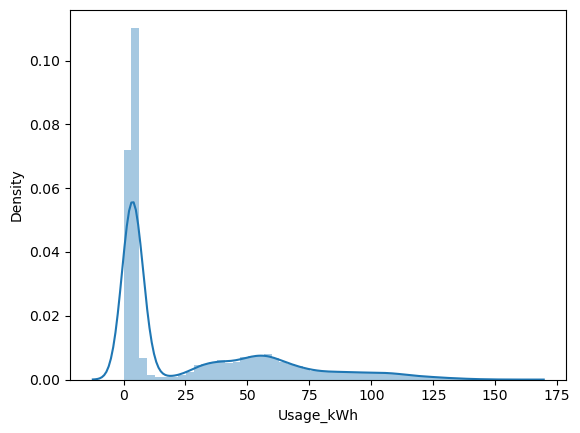

In [61]:
# Assumption 3: Assumption of Normality, the dependent variable should follow an approximate normal distribution

sns.distplot(Y) # we check Y data
plt.show()

In [62]:
#right skwed data

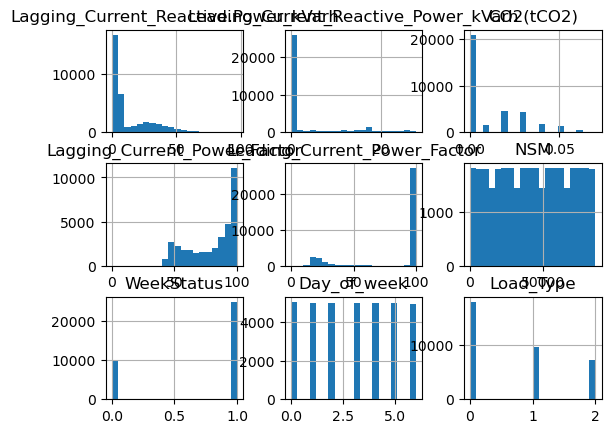

In [63]:
X.hist(bins = 20) # we check X variables
plt.show()


In [64]:
Y_log1p = np.log1p(Y)



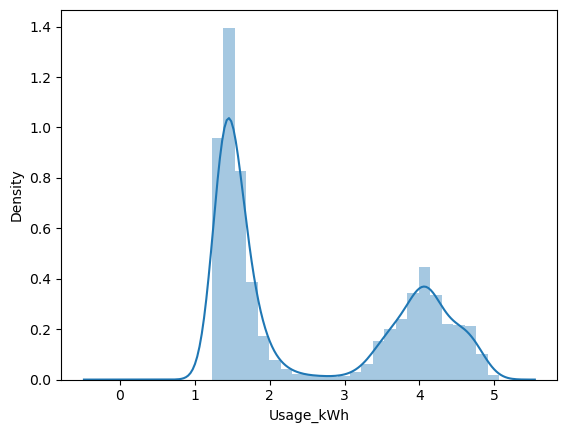

In [65]:
sns.distplot(Y_log1p) # we check Y data
plt.show()

In [66]:
# To log tarnsform only those independent variable X which has skewness

from scipy.stats import skew
# finding the skewness in each varibale
data_num_skew = X.apply(lambda i : skew(i.dropna()))
# Subsetting the varibale that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > 0.75) | (data_num_skew < -0.75)]

print(data_num_skew)
print(data_num_skewed)
# import numpy as np
# Apply log + 1 transformation for all numeric features with skewness over 0.75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
# X["newspaper"] = np.log1p(X["newspaper"])

# if there is 0 in X variable the take log1p (adds 1 then takes log)

Lagging_Current_Reactive.Power_kVarh    1.434329
Leading_Current_Reactive_Power_kVarh    1.732384
CO2(tCO2)                               1.145894
Lagging_Current_Power_Factor           -0.610632
Leading_Current_Power_Factor           -1.510081
NSM                                    -0.002367
WeekStatus                             -0.955879
Day_of_week                             0.004042
Load_Type                               0.603033
dtype: float64
Lagging_Current_Reactive.Power_kVarh    1.434329
Leading_Current_Reactive_Power_kVarh    1.732384
CO2(tCO2)                               1.145894
Leading_Current_Power_Factor           -1.510081
WeekStatus                             -0.955879
dtype: float64


                                      Lagging_Current_Reactive.Power_kVarh  \
Lagging_Current_Reactive.Power_kVarh                              1.000000   
Leading_Current_Reactive_Power_kVarh                             -0.767921   
CO2(tCO2)                                                         0.781753   
Lagging_Current_Power_Factor                                     -0.149272   
Leading_Current_Power_Factor                                      0.715125   
NSM                                                              -0.091884   
WeekStatus                                                        0.384254   
Day_of_week                                                      -0.308886   
Load_Type                                                         0.370729   

                                      Leading_Current_Reactive_Power_kVarh  \
Lagging_Current_Reactive.Power_kVarh                             -0.767921   
Leading_Current_Reactive_Power_kVarh                           

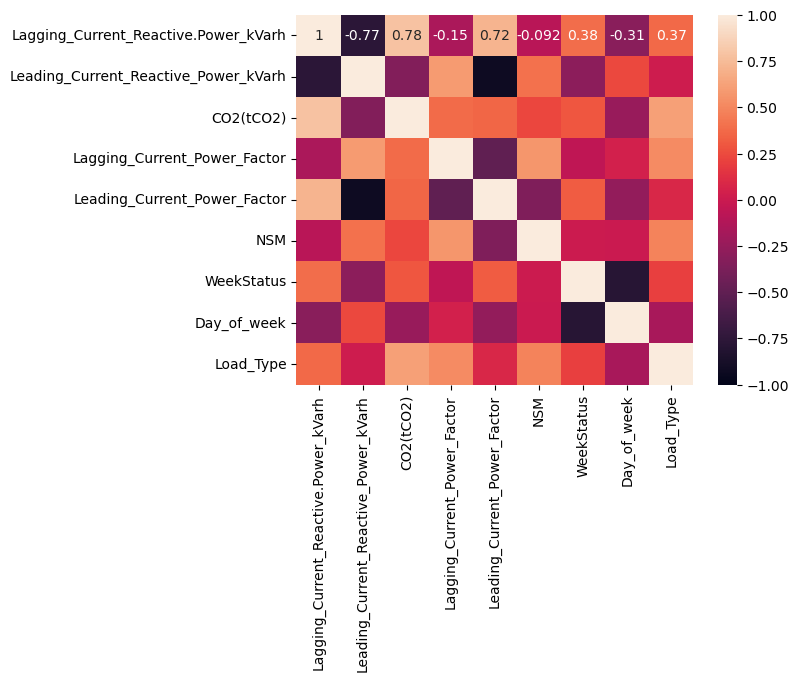

In [67]:
# Assumption of NO multi-collinearity: There should should be no multi-collinearity between the independent variables
# multi-collinearity is relationship amongst the multiple independent variables

corr_df = X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df, vmax = 1.0, vmin = -1.0, annot = True)
plt.show()

# No highly correlated pairs are observed so we go ahead with all the variables

In [68]:
# Lagging_Current_Reactive.Power_kVarh is highly correlated with Leading_Current_Reactive_Power_kVarh
# Leading_Current_Reactive_Power_kVarh is highly correlated with Leading_Current_Power_Factor
# Day_of_week is highly correlated with WeekStatus

# Drop Leading_Current_Reactive_Power_kVarh
# Drop WeekStatus

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # 1 will point to number of columns saying number of iterations
vif_df.round(2)

,features,VIF Factor
0,Lagging_Current_Reactive.Power_kVarh,29.07
1,Leading_Current_Reactive_Power_kVarh,9.62
2,CO2(tCO2),9.94
3,Lagging_Current_Power_Factor,71.73
4,Leading_Current_Power_Factor,70.28
5,NSM,6.66
6,WeekStatus,9.93
7,Day_of_week,8.35
8,Load_Type,3.64


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print(x)

In [71]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [72]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(27967, 9)
(27967,)
(6992, 9)
(6992,)


In [73]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

27.412825192896005
[ 3.71761990e+00  1.00735231e+00  2.98398824e+01  1.44544861e+00
 -4.44324443e-02 -5.21098846e-02 -2.27216961e-02 -1.84959171e-01
  1.05454048e-01]


In [75]:
# predict using the models
Y_pred = lm.predict(X_test) 
print(Y_pred)

[  4.40929324   2.90293272 104.20497965 ...  65.78244909   3.08752473
  85.58584413]


In [77]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.977192150808906
RMSE: 5.057687619059296
Adj R-square: 0.9771862773749674


In [35]:
# Dropping highly correlated and VIF features 

X.drop("Leading_Current_Reactive_Power_kVarh", axis=1, inplace=True)
X.drop("WeekStatus", axis=1, inplace=True)
X.drop("Lagging_Current_Power_Factor", axis=1, inplace=True)

In [38]:
print(X.shape)
print(Y.shape)

(34959, 6)
(34959,)


In [39]:
from sklearn.model_selection import train_test_split

# Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [40]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(27967, 6)
(27967,)
(6992, 6)
(6992,)


In [41]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
# train the model object
lm.fit(X_train, Y_train)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

9.882644580668437
[ 1.67723693e+00  1.97846524e+03 -1.95358753e+00  2.83969185e-06
 -9.59007845e-02  6.92649227e-01]


In [42]:
print(list(zip(X.columns, lm.coef_)))

[('Lagging_Current_Reactive.Power_kVarh', 1.6772369326830812), ('CO2(tCO2)', 1978.4652407774154), ('Leading_Current_Power_Factor', -1.9535875252563049), ('NSM', 2.8396918460936848e-06), ('Day_of_week', -0.09590078448896636), ('Load_Type', 0.6926492272363585)]


In [43]:
# predict using the models
Y_pred = lm.predict(X_test) 
print(Y_pred)

[  3.82306763   4.37740607 104.71878725 ...  65.43923497   2.29125481
  86.2442249 ]


In [44]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2 = r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1 - r2) * (len(Y) -1 )/(len(Y) - X.shape[1] - 1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.9764863540640496
RMSE: 5.135347337074667
Adj R-square: 0.9764823176176197
